# Linear Regression

### import libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True) 

### Load DataSet

In [2]:
salary_data = pd.read_csv('Salary_Data.csv')

In [3]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
salary_data.shape

(30, 2)

### plot the relationship

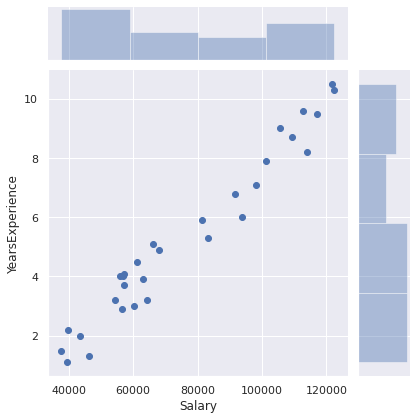

In [5]:
sns.jointplot(salary_data['Salary'],salary_data['YearsExperience']);

In [6]:
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
salary_data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


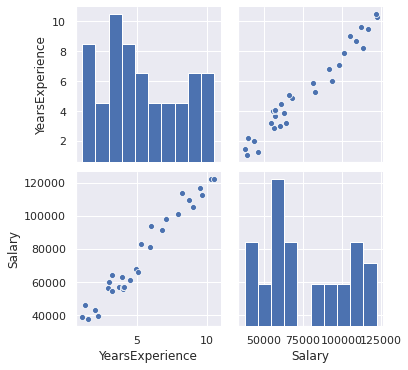

In [8]:
sns.pairplot(salary_data[['YearsExperience','Salary']]);

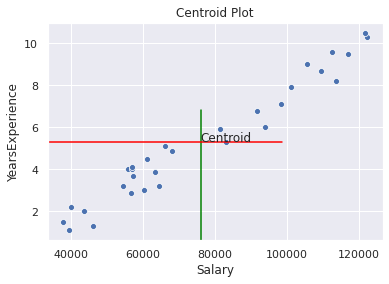

In [9]:
# Displaying centroid

# calculate mean
salary_mean = salary_data.Salary.mean()
yoe_mean = salary_data.YearsExperience.mean()

# scatter plot
plt.title(label="Centroid Plot");
sns.scatterplot(salary_data['Salary'],salary_data['YearsExperience']);

# draw horizontal and vertical line on mean
plt.axvline(x=salary_mean,ymax=0.6,color="green");
plt.axhline(y=yoe_mean,xmax=0.7,color="red");

# display text
plt.text(x=salary_mean,y=yoe_mean,s="Centroid");


### Calculate Regression Line
> $ \bar{Y} = {(b_0 + b_1x_i)} $
- $ \bar{Y} $ (Estimated value (Salary in this case))
- $ {(b_0)} $ (Y Intercept)
- $ {(b_1)} $ (Slope)

### Regression Model
> $ Y = {(\beta_0 + \beta_1x)} + e$
- $ \beta_0 $ (Y Intercept)
- $ \beta_1 $ (Slope)
- e (Error)

### Slope
> $ b_1 = \frac{\displaystyle\sum(x_i - \bar{x})(y_i-\bar{y})} {\displaystyle\sum(x_i - \bar{x})^2} $
- $ \bar{x} $ (mean of Independent Variable)
- $ \bar{y} $ (mean of Dependent Variable)
- $ x_i $ (value of Independent Variable)
- $ y_i $ (value of Dependent Variable)

## Calculation

### Calculate salary deviation
$x_i - \bar{x}$

In [10]:
salary_data['Salary_Deviation'] = salary_data.Salary.map(lambda s: s-salary_mean)
salary_data.head(2)

,YearsExperience,Salary,Salary_Deviation
0,1.1,39343.0,-36660.0
1,1.3,46205.0,-29798.0


### Calculate YOE Deviation
$ y_i - \bar{y}$

In [11]:
salary_data['YoE_Deviation'] = salary_data.YearsExperience.map(lambda ye:ye-yoe_mean)
salary_data.head(2)

,YearsExperience,Salary,Salary_Deviation,YoE_Deviation
0,1.1,39343.0,-36660.0,-4.213333
1,1.3,46205.0,-29798.0,-4.013333


### Calculate Deviation Product
$ {(x_i - \bar{x})(y_i-\bar{y})} $

In [12]:
salary_data['Deviation_product'] = salary_data.Salary_Deviation * salary_data.YoE_Deviation
salary_data.head(2)

,YearsExperience,Salary,Salary_Deviation,YoE_Deviation,Deviation_product
0,1.1,39343.0,-36660.0,-4.213333,154460.800000
1,1.3,46205.0,-29798.0,-4.013333,119589.306667


### Calcualte squared error
$ {(x_i - \bar{x})^2} $

In [13]:
salary_data['squared_error'] = salary_data.Deviation_product*salary_data.Deviation_product
salary_data.head(2)

,YearsExperience,Salary,Salary_Deviation,YoE_Deviation,Deviation_product,squared_error
0,1.1,39343.0,-36660.0,-4.213333,154460.800000,2.385814e+10
1,1.3,46205.0,-29798.0,-4.013333,119589.306667,1.430160e+10


### Calculate Slope
$ b_1 = \frac{\displaystyle\sum(x_i - \bar{x})(y_i-\bar{y})} {\displaystyle\sum(x_i - \bar{x})^2} $

In [14]:
b1 = salary_data.Deviation_product.sum() / salary_data.squared_error.sum()
b1

7.344085436580283e-06

### Calculate Intercept
$ b_0 = \bar{y} - b_1\bar{x} $ 

In [15]:
b0 = salary_mean - b1*yoe_mean
b0

76002.99996097843

### Regression Line
$ \bar{Y} = {(b_0 + b_1x_i)} $

In [16]:
salary_data['estimated_salary'] = b0 + salary_data.YearsExperience*b1

9449.962321455076 25792.200198668677
76002.99996097843 7.344085436580283e-06


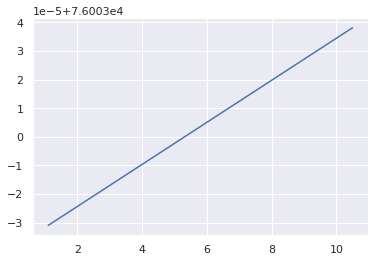

In [17]:
# regression line plot
#plt.plot(salary_data.YearsExperience,salary_data.Salary,'o');
m, b = np.polyfit(salary_data.YearsExperience,salary_data.Salary, 1)
print(m,b)
print(b0,b1)
plt.plot(salary_data.YearsExperience, salary_data.YearsExperience*b1 + b0);

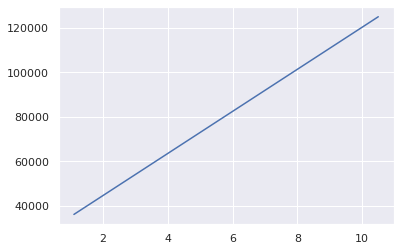

In [18]:
plt.plot(salary_data.YearsExperience,m*salary_data.YearsExperience+b)

### Using Python Libraries

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [20]:
salary_df = pd.read_csv('Salary_Data.csv')
salary_df.head(2)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0


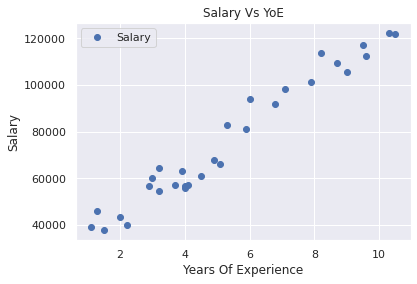

In [26]:
salary_df.plot(x='YearsExperience',y='Salary',style='o');
plt.title('Salary Vs YoE');
plt.xlabel('Years Of Experience');
plt.ylabel('Salary');
plt.show();

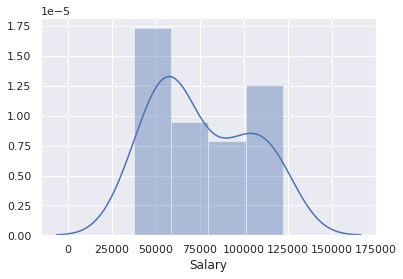

In [28]:
# plot avgerage of salary and yoe respectievely
sns.distplot(salary_df.Salary);
# this shows a distributions, kde

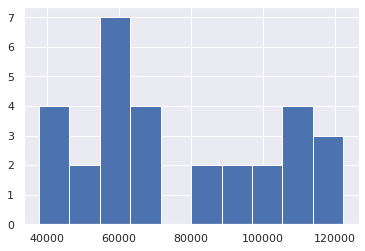

In [30]:
plt.hist(salary_df.Salary);

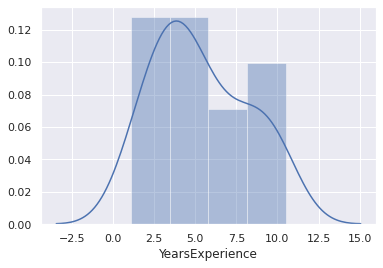

In [32]:
sns.distplot(salary_df.YearsExperience);

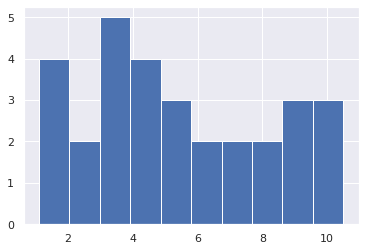

In [34]:
plt.hist(salary_df.YearsExperience);

In [43]:
# define labels and divide our dataset into train and test category

X = salary_df.YearsExperience.values.reshape(-1,1);
y = salary_df.Salary.values.reshape(-1,1);

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0);

In [45]:
# now we have splitted our data set , we will train our model on training set and 
# test data test the model with.
# For this we will use LinearRegression Class, instantiate it and use fit() method along with
# our training data

# Initialize
regressor = LinearRegression()

# train the model
regressor.fit(X_train,y_train)

LinearRegression()

In [46]:
# LinearRegression model basically find the best value for the intercept and slope, which results in 
# a line that best fits the data.
print('Intercept',regressor.intercept_)
print('Slope',regressor.coef_)

Intercept [26780.09915063]
Slope [[9312.57512673]]


In [52]:
# now after training the model , we will make some predictions using our test data and then 
# see how accuretly our algorithm predicts the percentage score.

y_pred = regressor.predict(X_test)
print(y_pred)
print(y_test)

[[ 40748.96184072]
 [122699.62295594]
 [ 64961.65717022]
 [ 63099.14214487]
 [115249.56285456]
 [107799.50275317]]
[[ 37731.]
 [122391.]
 [ 57081.]
 [ 63218.]
 [116969.]
 [109431.]]


In [53]:
# now we will compare the actual output values for X_test with the predicted values,
test_prediction_df = pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()})
test_prediction_df

,Actual,Predicted
0,37731.0,40748.961841
1,122391.0,122699.622956
2,57081.0,64961.657170
3,63218.0,63099.142145
4,116969.0,115249.562855
5,109431.0,107799.502753


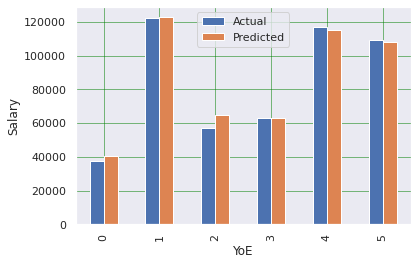

In [56]:
# visualizing the prediction
test_prediction_df.plot(kind='bar')
plt.grid(which = 'major' ,linestyle = '-', linewidth = '0.5' , color = 'green')
plt.grid(which = 'minor' ,linestyle = '-', linewidth = '0.5' ,color = 'blue')
plt.xlabel('YoE')
plt.ylabel('Salary')
plt.show()